# Day 1. Simple Linear Regression
Today we will learn some basics of SLR and implement it in Python in 3 ways:
1. From Scratch
2. Using Statsmodels 
3. Using Scikit-learn

## 1. Introduction

##### _"Our aim is to find the coefficients $b_0$ and $b_1$ from the training dataset (X) and then using those same coefficients we try to predict for the new data (y)."_

The equation of Simple Linear Regression is the linear combination of the input variables (X) with the output variables (y).

$${\hat{y}  =  b_0  +  b_1x}$$

$${where, \hat{y} = Output/Predicted}$$
       $${x = Input/Predictor}$$ 
       $${b_0, b_1 = Coffecients}$$ 


## 2. Implementation

### 2.1 From Scratch

Before writing any function let's first see what does out data looks like. We generate a small dataset for this and work with it for simplicity.

| X | y |
|---|---|
| 1 | 1 |
| 2 | 3 |
| 4 | 3 |
| 3 | 2 |
| 5 | 5 |


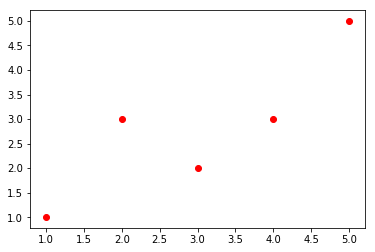

In [8]:
%matplotlib inline
from matplotlib import pyplot

# Visualize the dataset
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
X = [row[0] for row in dataset]
y = [row[1] for row in dataset]
pyplot.scatter(X, y, color='red')
pyplot.show()


So our aim here is to find y using X. To do so we will start by defining mean, variance and covariance using those formulas.
The covariance describes the relation between X and y.

$${\mu = \frac{x_i}{n}}$$
$${\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}}$$
$${cov_{x,y}=\frac{\displaystyle\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n}}$$

In [9]:
# Calculate the mean of list of values 
def mean(values):
    return sum(values) / float(len(values))

# Calculate the variance 
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# Calculate covariance between X and y
def covariance(X, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(X)):
        covar += (X[i] - mean_x) * (y[i] - mean_y)
    return covar

Now we will calculate the coefficents that will help us in prediction. A simple $b$ can be calculated using 

$${b = \frac{Cov\thinspace(X,\thinspace y)}{Var\thinspace(X)}}$$

In [10]:
# Estimate Coefficients
def coefficients(dataset):
    X = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    X_mean, y_mean = mean(X), mean(y)
    b1 = covariance(X, X_mean, y, y_mean) / variance(X, X_mean)
    b0 = y_mean - b1 * X_mean
    return [b0, b1]

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

In [11]:
from math import sqrt

# Calculate RMSE
def rmse_metric(actual, predicted):
    sum_error = 0.0 
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)


Now we will implement the algorithm that calculates $\hat{y}$ using formula ${\hat{y}  =  b_0  +  b_1x}$

In [14]:
# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions    

# Evaluate regression algo on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)   # remove the y and keep only x
    predicted = algorithm(dataset, test_set)
    print("Predicted values ",predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse   

Now our program is ready. We can test this on our dataset.

In [15]:
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

Predicted values  [1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


### 2.2 Using Statsmodels 
We can also do SRL using statsmodels library. We can fit our model using the fit() and predict using predict(). 


**NOTE:** OLS take y as first parameter and X as second parameter.

In [16]:
import warnings;warnings.filterwarnings('ignore')

import statsmodels.api as sm

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

# Input
X = [row[0] for row in dataset]

# Output
y = [row[1] for row in dataset]

# Add b_0
X = sm.add_constant(X)

# Fitting model
model = sm.OLS(y, X).fit()

# Prediction
predictions = model.predict(X) 

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     8.000
Date:                Sun, 08 Jul 2018   Prob (F-statistic):             0.0663
Time:                        13:49:25   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4000      0.938      0.426      0.6

### 2.3 Using Sklearn
We can do this by using linear_model. We have also imported mean_squared_error and r2_score module to fine the MSE and r2

In [17]:
import warnings;warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

# Input
X = np.asarray([row[0] for row in dataset]).reshape(-1, 1)

# Output
y = np.asarray([row[1] for row in dataset]).reshape(-1, 1)

# define classifier
regr = linear_model.LinearRegression()

# Fit the model
regr.fit(X, y)

# Prediction
predictions = regr.predict(X) 

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, predictions))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, predictions))

Coefficients: 
 [[0.8]]
Mean squared error: 0.48
Variance score: 0.73


Ref: <br>
[1] https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/ <br>
[2] https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9 <br>
[3] http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html